<a href="https://colab.research.google.com/github/hsilva-unam/THC_Semestre_06_01_ProyectoFinal/blob/main/THC_Proyecto_Final_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Nacional Autónoma de México (UNAM)
Facultad de Ciencias
Licenciatura en Matemáticas Aplicadas
Materia: Taller de herramientas computacionales
Proyecto final

Integrantes:
 1. Estrada Villar Francisco Nathanael 323138011
 2. Platero Reyes Abygail
 323119957
 3. Silva Hernández Hector
 300158289


In [5]:
!pip install pycountry-convert pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.9/252.9 kB 15.9 MB/s eta 0:00:00


===== Dimensiones de la base =====
Filas, columnas: (50418, 9)

===== Información de columnas (df.info()) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CODE     50418 non-null  object        
 1   COUNTRY  50418 non-null  object        
 2   DATE     50418 non-null  datetime64[ns]
 3   HDI      44216 non-null  float64       
 4   TC       50418 non-null  float64       
 5   TD       50418 non-null  float64       
 6   STI      50418 non-null  float64       
 7   POP      50418 non-null  float64       
 8   GDPCAP   50418 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 3.5+ MB
None

===== Resumen estadístico (df.describe(include='all')) =====
         CODE      COUNTRY                           DATE           HDI  \
count   50418        50418                          50418  44216.000000 

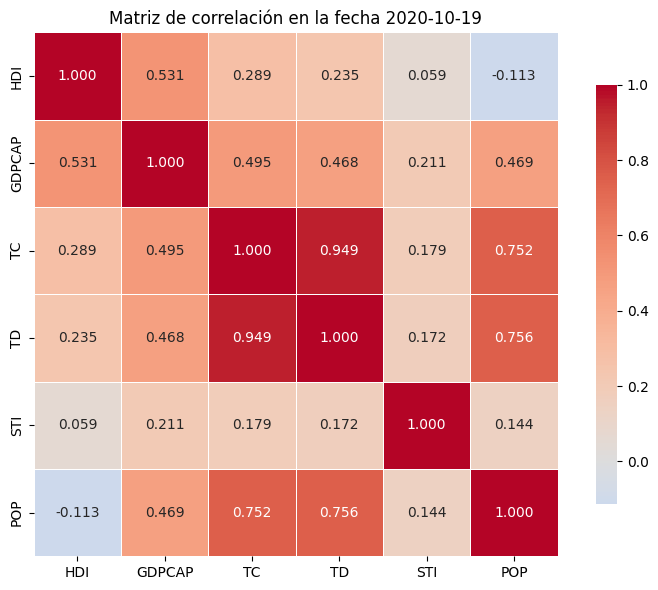

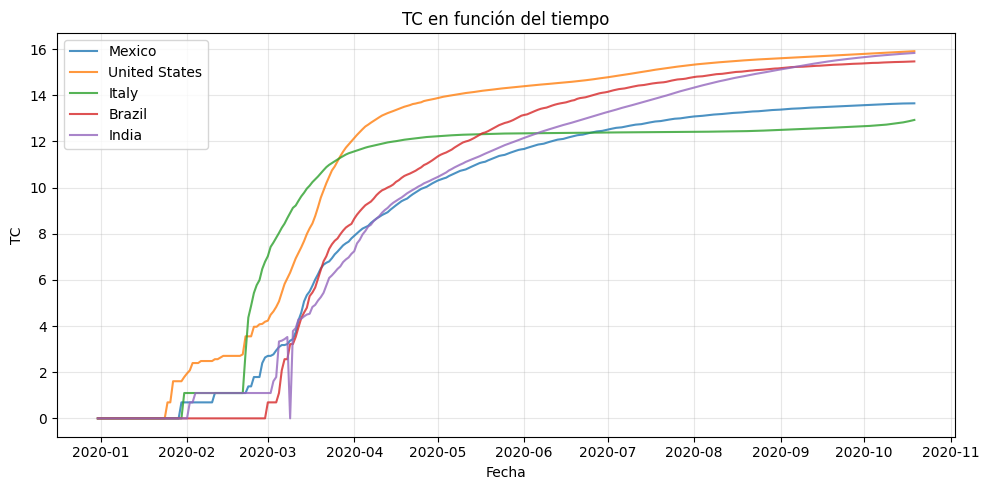

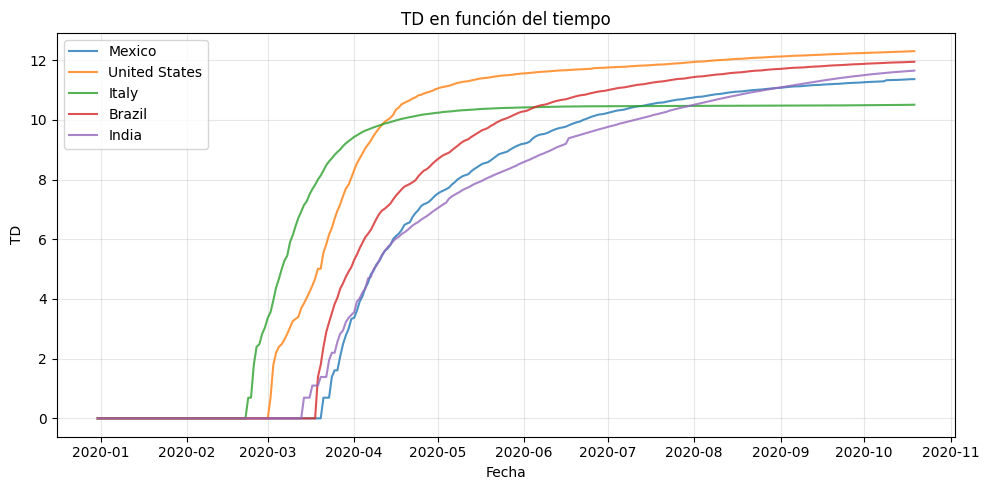

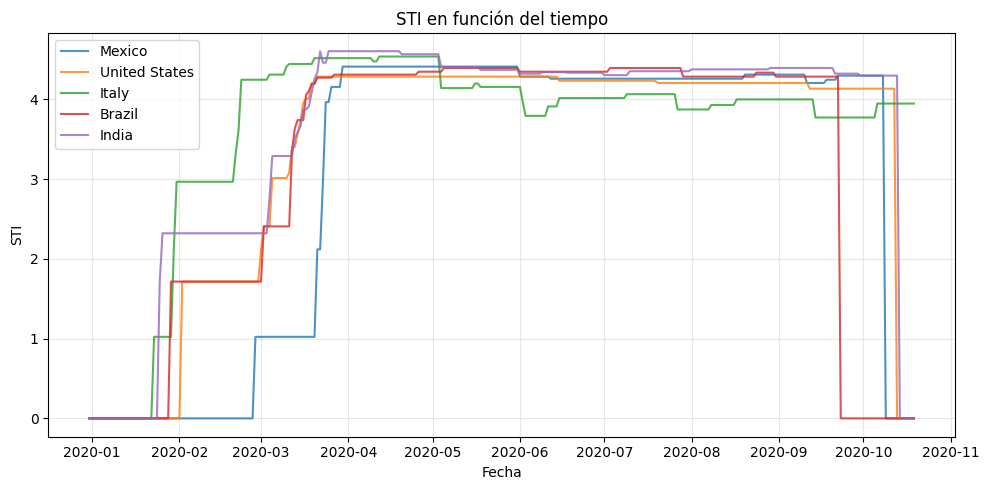

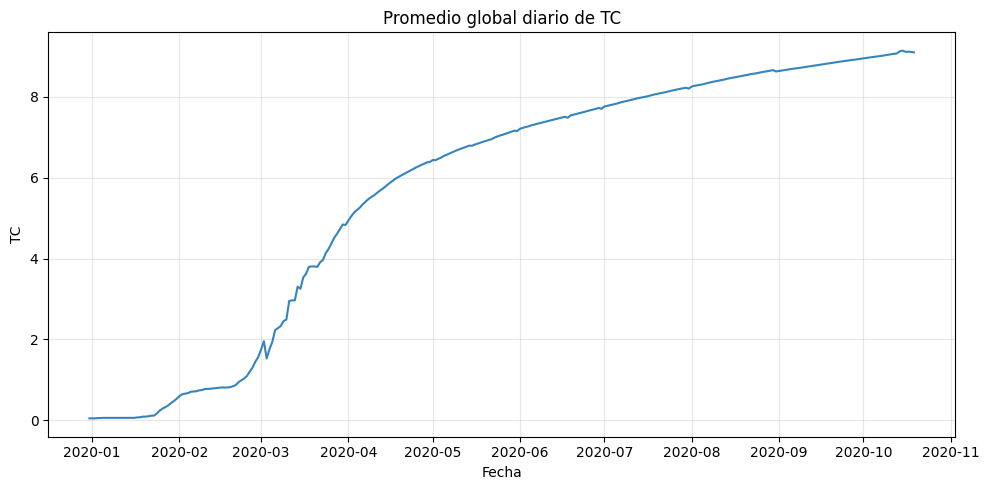

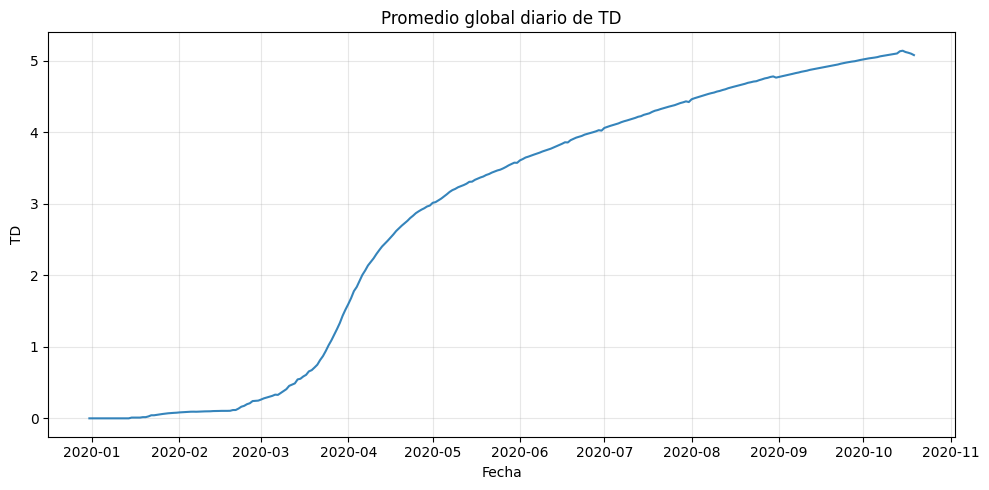

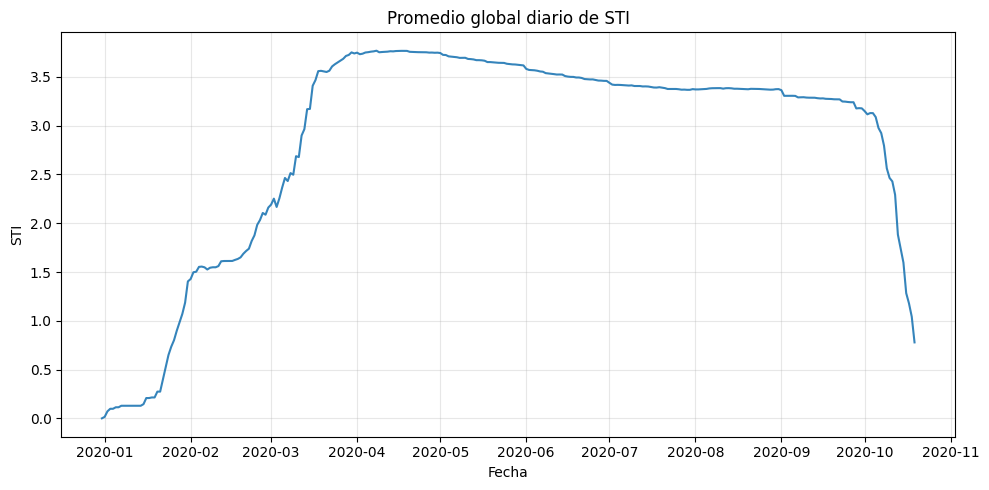


Países inicialmente clasificados como 'Other':
Kosovo
Sint Maarten (Dutch part)
Timor
Vatican

Todos los países 'Other' han sido asignados a un continente.

Primeras filas de la tabla agrupada por continente:
        DATE      Continent        TC   TD
0 2019-12-31         Africa  0.000000  0.0
1 2019-12-31           Asia  3.295837  0.0
2 2019-12-31         Europe  0.000000  0.0
3 2019-12-31  North America  0.000000  0.0
4 2019-12-31        Oceania  0.000000  0.0


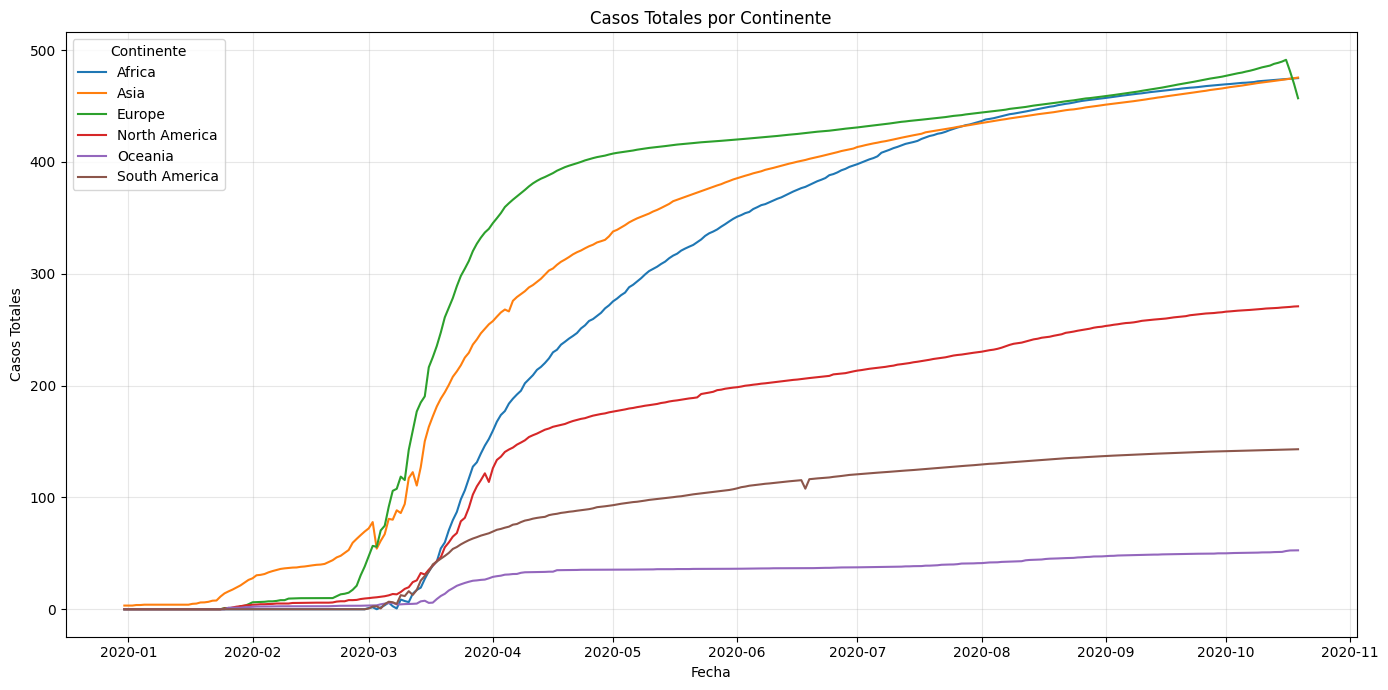

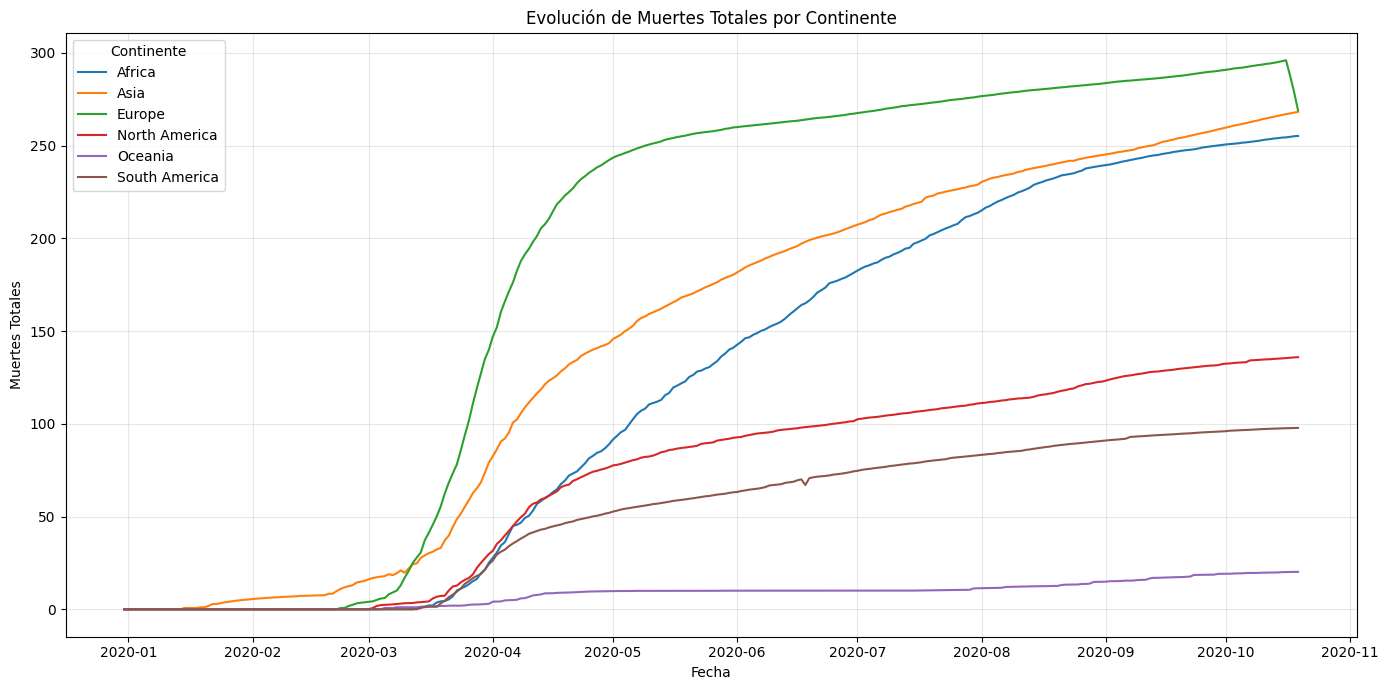

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc  # Para agrupar países por continente


RUTA_CSV = "/content/ECOVSCOVID.csv"


def cargar_datos(ruta: str) -> pd.DataFrame:
    """
    Carga la base de datos de COVID y convierte la columna DATE a tipo datetime.
    """
    df = pd.read_csv(ruta)
    df["DATE"] = pd.to_datetime(df["DATE"])
    return df


def resumen_datos(df: pd.DataFrame) -> None:
    """
    resumen estadístico de la base.
    """
    print("===== Dimensiones de la base =====")
    print("Filas, columnas:", df.shape)
    print("\n===== Información de columnas (df.info()) =====")
    print(df.info())
    print("\n===== Resumen estadístico (df.describe(include='all')) =====")
    print(df.describe(include="all"))


def datos_faltantes(df: pd.DataFrame) -> None:
    """
    Muestra el número de datos faltantes por columna.
    """
    print("\n===== Datos faltantes por columna =====")
    na_counts = df.isna().sum().sort_values(ascending=False)
    print(na_counts)


def imputar_hdi(df: pd.DataFrame) -> pd.DataFrame:
    """
    Imputa los valores faltantes de HDI usando el promedio por país.

    """
    df = df.copy()
    df["HDI"] = df.groupby("COUNTRY")["HDI"].transform(
        lambda s: s.fillna(s.mean())
    )
    return df


def correlaciones_ultimo_dia(df: pd.DataFrame, fecha: str = None) -> None:
    """
    Calcula la matriz de correlación entre HDI, GDPCAP, TC, TD, STI y POP
    en una fecha específica: la última fecha disponible.
    Además de imprimir la matriz numérica, muestra un mapa de calor
    (heatmap) coloreado de dicha matriz.
    """
    if fecha is None:
        fecha = df["DATE"].max()
    else:
        fecha = pd.to_datetime(fecha)

    subset = df[df["DATE"] == fecha]
    columnas = ["HDI", "GDPCAP", "TC", "TD", "STI", "POP"]
    corr = subset[columnas].corr()
    print(f"\n===== Correlaciones en la fecha {fecha.date()} =====")
    print(corr)

    # Heatmap de la matriz de correlación
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    plt.title(f"Matriz de correlación en la fecha {fecha.date()}")
    plt.tight_layout()
    plt.show()


def graficar_parametros_por_pais(
    df: pd.DataFrame,
    paises: list,
    parametros: list
) -> None:
    """
    gráficas de parámetros (TC, TD, STI, etc.) en función del tiempo
    para una lista de países.

    """
    for param in parametros:
        plt.figure(figsize=(10, 5))
        for pais in paises:
            subset = df[df["COUNTRY"] == pais]
            if subset.empty:
                continue
            plt.plot(subset["DATE"], subset[param], label=pais, alpha=0.8)
        plt.title(f"{param} en función del tiempo")
        plt.xlabel("Fecha")
        plt.ylabel(param)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


def graficar_promedios_globales(df: pd.DataFrame, parametros: list) -> None:
    """
    Grafica la evolución temporal de los promedios globales
    """
    df_group = df.groupby("DATE")[parametros].mean().reset_index()

    for param in parametros:
        plt.figure(figsize=(10, 5))
        plt.plot(df_group["DATE"], df_group[param], alpha=0.9)
        plt.title(f"Promedio global diario de {param}")
        plt.xlabel("Fecha")
        plt.ylabel(param)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


# =========================
# Análisis por continente
# =========================

def iso3_to_continent(iso3: str) -> str:
    """
    Convierte un código de país.
    Si no se puede convertir, regresa 'Other'.
    """
    try:
        iso2 = pc.country_alpha3_to_country_alpha2(iso3)
        cont_code = pc.country_alpha2_to_continent_code(iso2)
        cont_name = pc.convert_continent_code_to_continent_name(cont_code)
        return cont_name
    except Exception:
        return "Other"


def analisis_por_continente(df: pd.DataFrame) -> None:
    """
    Añade la columna 'Continent' usando pycountry_convert y genera las gráficas de casos y muertes totales por continente

    """
    df = df.copy()

    # Crear columna de continente a partir de CODE (ISO3)
    df["Continent"] = df["CODE"].apply(iso3_to_continent)

    # Identificar países inicialmente clasificados como 'Other'
    otros_paises_inicial = df[df['Continent'] == 'Other']['COUNTRY'].unique()
    print("\nPaíses inicialmente clasificados como 'Other':")
    for country in otros_paises_inicial:
        print(country)

    # Asignación manual para algunos casos 'Other'
    otros = {
        'Kosovo': 'Europe',
        'Sint Maarten (Dutch part)': 'North America',
        'Timor': 'Asia',  # Asumiendo Timor-Leste
        'Vatican': 'Europe'
    }

    for country, continente in otros.items():
        df.loc[df['COUNTRY'] == country, 'Continent'] = continente

    # Identificar países que aún quedan como 'Other' después de la asignación manual
    otros_paises_final = df[df['Continent'] == 'Other']['COUNTRY'].unique()
    if len(otros_paises_final) > 0:
        print("\nPaíses que aún quedan clasificados como 'Other':")
        for country in otros_paises_final:
            print(country)
    else:
        print("\nTodos los países 'Other' han sido asignados a un continente.")

    # Agrupar por fecha y continente, sumando TC y TD
    df_grouped = df.groupby(["DATE", "Continent"])[["TC", "TD"]].sum().reset_index()
    print("\nPrimeras filas de la tabla agrupada por continente:")
    print(df_grouped.head())

    # Gráfico de Casos Totales por Continente
    plt.figure(figsize=(14, 7))
    for continente in df_grouped['Continent'].unique():
        subset = df_grouped[df_grouped['Continent'] == continente]
        plt.plot(subset['DATE'], subset['TC'], label=continente)

    plt.title('Casos Totales por Continente')
    plt.xlabel('Fecha')
    plt.ylabel('Casos Totales')
    plt.legend(title='Continente')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig("grafica1CT.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Gráfico de Evolución de Muertes Totales por Continente
    plt.figure(figsize=(14, 7))
    for continente in df_grouped['Continent'].unique():
        subset = df_grouped[df_grouped['Continent'] == continente]
        plt.plot(subset['DATE'], subset['TD'], label=continente)

    plt.title('Evolución de Muertes Totales por Continente')
    plt.xlabel('Fecha')
    plt.ylabel('Muertes Totales')
    plt.legend(title='Continente')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig("grafica2.png", dpi=300, bbox_inches="tight")
    plt.show()


def main():
    # 1. Cargar datos
    df = cargar_datos(RUTA_CSV)

    # 2. Análisis general
    resumen_datos(df)
    datos_faltantes(df)

    # 3. Manejo de datos faltantes en HDI
    df = imputar_hdi(df)
    print("\n===== Datos faltantes después de imputar HDI =====")
    print(df.isna().sum())

    # 4. Correlaciones en el último día disponible (numérico + heatmap)
    correlaciones_ultimo_dia(df)

    # 5. Gráficas por países
    paises_interes = ["Mexico", "United States", "Italy", "Brazil", "India"]
    parametros_interes = ["TC", "TD", "STI"]

    graficar_parametros_por_pais(df, paises=paises_interes,
                                 parametros=parametros_interes)

    # 6. Gráficas de promedios globales por fecha
    graficar_promedios_globales(df, parametros_interes)

    # 7. Análisis por continente (nuevo bloque incorporado)
    analisis_por_continente(df)


if __name__ == "__main__":
    main()
